In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import goalsdata as gd
import pandas as pd

In [106]:
df_mh = gd.loadData('br', 'match_history')

In [107]:
df_mh.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Opp Formation', 'Referee', 'Match Report', 'Notes', 'season',
       'league_name', 'league_id', 'team_name', 'Sh', 'SoT', 'SoT%', 'G/Sh',
       'G/SoT', 'Dist', 'xG', 'xGA', 'SoTA', 'Saves', 'Save%', 'PSxG',
       'PSxG+/-', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast', 'xAG',
       'xA', 'CrsPA', 'PrgP', 'KP', 'pass_3rd', 'Sw', 'Crs', 'TB', 'CK', 'SCA',
       'GCA', 'Tkl', 'TklW', 'Tkl_Def_3rd', 'Tkl_Att_3rd', 'Blocks', 'Int',
       'Clr', 'Err', 'Touches_Att_3rd', 'PrgC', 'Carries_Att_3rd', 'Mis',
       'Dis', 'Fls', 'Off', 'Recov', 'Won%'],
      dtype='object')

In [108]:
df_mh = df_mh.loc[df_mh['Comp'] == 'Série A']

In [109]:
formula = "GF ~ pass_3rd + Touches_Att_3rd + Carries_Att_3rd + Recov"

In [110]:
data = df_mh[
    [
       'GF',
       'pass_3rd',
       'Touches_Att_3rd',
       'Carries_Att_3rd',
       'Recov' 
    ]
]

In [111]:
data.loc[:, 'GF'] = pd.to_numeric(data['GF'], errors='raise').astype(int)

In [112]:
model = smf.glm(formula=formula, data=data, family=sm.families.Poisson()).fit()

ValueError: endog has evaluated to an array with multiple columns that has shape (4392, 8). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [57]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     GF   No. Observations:                 4392
Model:                            GLM   Df Residuals:                     4385
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5540.9
Date:                Fri, 25 Oct 2024   Deviance:                       3781.8
Time:                        17:47:20   Pearson chi2:                 3.18e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2452
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2346      0.083     

In [ ]:
model.resid_pearson

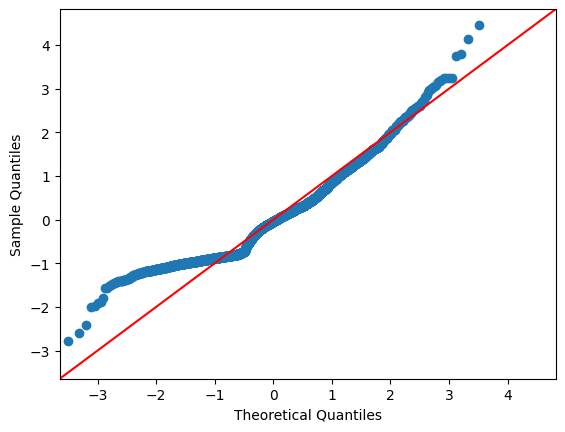

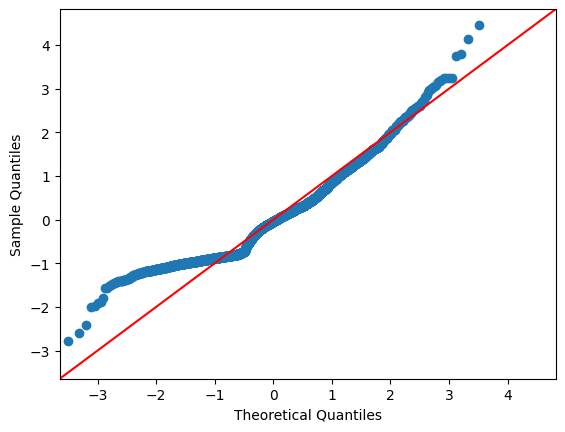

In [61]:
sm.qqplot(model.resid_pearson, line='45')